
**Install requirements**

In [1]:
!pip3 install 'torch==1.3.1'
!pip3 install 'torchvision==0.5.0'
!pip3 install 'Pillow-SIMD'
!pip3 install 'tqdm'

     |████████████████████████████████| 734.6MB 24kB/s 
ERROR: torchvision 0.6.0+cu101 has requirement torch==1.5.0, but you'll have torch 1.3.1 which is incompatible.
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
     |████████████████████████████████| 4.0MB 2.8MB/s 
     |████████████████████████████████| 753.4MB 14kB/s 
  Found existing installation: torch 1.3.1
    Uninstalling torch-1.3.1:
      Successfully uninstalled torch-1.3.1
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101
     |████████████████████████████████| 634kB 2.7MB/s 
  Created wheel for Pillow-SIMD: filename=Pillow_SIMD-7.0.0.post3-cp36-cp36m-linux_x86_64.whl size=1110355 sha256=b61f6156ad87db646daf5fb243379f70956c75202ea2218d54b12c08848e44b2
  Stored in directory: /root/.cache/pip/wheels/d3/ac/4f/4cdf8febba528e5f1b09fc58d5181

**Import libraries**

In [0]:
import os
import logging
import random

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Subset, DataLoader
from torch.backends import cudnn

import torchvision
from torchvision import transforms
from torchvision.models import alexnet
from torchvision.models import vgg19

from PIL import Image
from tqdm import tqdm

# **Set Arguments** 
##Provided by professor

In [0]:
DEVICE = 'cuda' # 'cuda' or 'cpu'
#List of all hyperparameters of the ntw
NUM_CLASSES = 102 # 101 + 1: There is am extra Background class that should be removed 

#BATCH_SIZE = 256     #(Default value) Higher batch sizes allows for larger learning rates. An empirical heuristic suggests that, when changing
                     # the batch size, learning rate should change by the same factor to have comparable results

BATCH_SIZE = 50      #for VGG19 Network

LR = 1e-3            # The initial Learning Rate #N: 5e-2
MOMENTUM = 0.9       # Hyperparameter for SGD, keep this at 0.9 when using SGD
WEIGHT_DECAY = 5e-5  # Regularization, you can keep this at the default

NUM_EPOCHS =  30      # Total number of training epochs (iterations over dataset) #N=60
STEP_SIZE = 20       # How many epochs before decreasing learning rate (if using a step-down policy)
GAMMA = 0.1          # Multiplicative factor for learning rate step-down

LOG_FREQUENCY = 10

##Set of new Hyperparameters for training from scratch

###First set of new parameters

In [0]:
#BEST COUPLE
#LR = 2.7e-2

#NUM_EPOCHS=36

#Accuracy 49% Loss 2.31



###Second set of new parameters

In [0]:
##alzo il learning rate e diminuisco la step size
#LR = 5.3e-2
#STEP_SIZE = 8

#accuracy finale 20% Loss 4.78

##Set of new Hyperparameters for pretrained network

###First Set

In [0]:
#Optimizer SGD
#LR=7e-4
#NUM_EPOCHS=40

###Second Set

In [0]:
#Optimizer Adam
#LR=7e-4



###Third Set(Best)

In [0]:
#optimizer SGD

#LR=1e-2
#STEP_SIZE = 8

###Final Best Set(Arranged to perform well with data augmentation)

In [0]:
#LR=5e-3
#STEP_SIZE=8

###(Extra) Set for VGG19

In [0]:
#Optimizer: Adam 

NUM_EPOCHS=23
LR = 5e-4

# **Define Data Preprocessing**

In [63]:
'''# Define transforms for training phase
train_transform = transforms.Compose([transforms.Resize(256),      # Resizes short size of the PIL image to 256
                                      transforms.CenterCrop(224),  # Crops a central square patch of the image
                                                                   # 224 because torchvision's AlexNet needs a 224x224 input!
                                                                   # Remember this when applying different transformations, otherwise you get an error
                                      transforms.ToTensor(), # Turn PIL Image to torch.Tensor
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalizes tensor with mean and standard deviation
])
# Define transforms for the evaluation phase
eval_transform = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))                                    
])'''

"# Define transforms for training phase\ntrain_transform = transforms.Compose([transforms.Resize(256),      # Resizes short size of the PIL image to 256\n                                      transforms.CenterCrop(224),  # Crops a central square patch of the image\n                                                                   # 224 because torchvision's AlexNet needs a 224x224 input!\n                                                                   # Remember this when applying different transformations, otherwise you get an error\n                                      transforms.ToTensor(), # Turn PIL Image to torch.Tensor\n                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalizes tensor with mean and standard deviation\n])\n# Define transforms for the evaluation phase\neval_transform = transforms.Compose([transforms.Resize(256),\n                                      transforms.CenterCrop(224),\n                                  

#**Define Data Preprocessing for pretrained network**

##Without data Augmentation

In [64]:
'''# Define transforms for training phase
train_transform = transforms.Compose([transforms.Resize(256),      # Resizes short size of the PIL image to 256
                                      transforms.CenterCrop(224),  # Crops a central square patch of the image
                                                                   # 224 because torchvision's AlexNet needs a 224x224 input!
                                                                   # Remember this when applying different transformations, otherwise you get an error
                                      transforms.ToTensor(), # Turn PIL Image to torch.Tensor
                                      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) # Normalizes tensor with mean and standard deviation
])
# Define transforms for the evaluation phase
eval_transform = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.485, 0.456, 0.406),  (0.229, 0.224, 0.225))                                    
])'''

"# Define transforms for training phase\ntrain_transform = transforms.Compose([transforms.Resize(256),      # Resizes short size of the PIL image to 256\n                                      transforms.CenterCrop(224),  # Crops a central square patch of the image\n                                                                   # 224 because torchvision's AlexNet needs a 224x224 input!\n                                                                   # Remember this when applying different transformations, otherwise you get an error\n                                      transforms.ToTensor(), # Turn PIL Image to torch.Tensor\n                                      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) # Normalizes tensor with mean and standard deviation\n])\n# Define transforms for the evaluation phase\neval_transform = transforms.Compose([transforms.Resize(256),\n                                      transforms.CenterCrop(224),\n                      

##With data Augmentation

In [0]:
# Define transforms for training phase
train_transform = transforms.Compose([transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
                                      transforms.RandomRotation(degrees=15),
                                      transforms.ColorJitter(),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.CenterCrop(224),  # Crops a central square patch of the image
                                                                   # 224 because torchvision's AlexNet needs a 224x224 input!
                                                                   # Remember this when applying different transformations, otherwise you get an error
                                      transforms.ToTensor(), # Turn PIL Image to torch.Tensor
                                      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) # Normalizes tensor with mean and standard deviation
])
# Define transforms for the evaluation phase
eval_transform = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.485, 0.456, 0.406),  (0.229, 0.224, 0.225))                                    
])

# **Prepare Dataset**

In [66]:
# Clone github repository with data
if not os.path.isdir('./Caltech101'):
  !git clone https://github.com/ele9996/Homework2-Caltech101.git
  !mv 'Homework2-Caltech101' 'Caltech101'

DATA_DIR = 'Caltech101/101_ObjectCategories'
from Caltech101.caltech_dataset import Caltech

# Prepare Pytorch train/test Datasets
train_dataset = Caltech(DATA_DIR, split='train',  transform=train_transform)
test_dataset = Caltech(DATA_DIR, split='test', transform=eval_transform)

datasetlen= len(train_dataset) 
#random.seed(20) #da togliere quando ho trovato i parametri giusti
train_indexes = random.sample(range(0,datasetlen),int(datasetlen/2))# split the indices for your train split
val_indexes = list(set(range(0,datasetlen))-set(train_indexes)) # split the indices for your val split 

val_dataset = Subset(train_dataset, val_indexes)

train_dataset = Subset(train_dataset, train_indexes)
# Check dataset sizes
print('Train Dataset: {}'.format(len(train_dataset)))
print('Valid Dataset: {}'.format(len(val_dataset)))
print('Test Dataset: {}'.format(len(test_dataset)))

Train Dataset: 2892
Valid Dataset: 2892
Test Dataset: 2893


# **Prepare Dataloaders**

In [0]:
# Dataloaders iterate over pytorch datasets and transparently provide useful functions (e.g. parallelization and shuffling)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

# **Prepare AlexNet Network**

In [68]:
'''net = alexnet() # Loading AlexNet model

# AlexNet has 1000 output neurons, corresponding to the 1000 ImageNet's classes
# We need 101 outputs for Caltech-101
net.classifier[6] = nn.Linear(4096, NUM_CLASSES) # nn.Linear in pytorch is a fully connected layer
                                                 # The convolutional layer is nn.Conv2d

# We just changed the last layer of AlexNet with a new fully connected layer with 101 outputs
# It is strongly suggested to study torchvision.models.alexnet source code'''


"net = alexnet() # Loading AlexNet model\n\n# AlexNet has 1000 output neurons, corresponding to the 1000 ImageNet's classes\n# We need 101 outputs for Caltech-101\nnet.classifier[6] = nn.Linear(4096, NUM_CLASSES) # nn.Linear in pytorch is a fully connected layer\n                                                 # The convolutional layer is nn.Conv2d\n\n# We just changed the last layer of AlexNet with a new fully connected layer with 101 outputs\n# It is strongly suggested to study torchvision.models.alexnet source code"

#**Prepare AlexNet Pretrained Network**

In [69]:
'''net = alexnet(pretrained=True) # Loading AlexNet model


#This code is for training only the last fully connected layer
#for param in net.parameters():
#  param.requires_grad = False



# AlexNet has 1000 output neurons, corresponding to the 1000 ImageNet's classes
# We need 101 outputs for Caltech-101

net.classifier[6] = nn.Linear(4096, NUM_CLASSES) # nn.Linear in pytorch is a fully connected layer

#I unfreeze only fully connected layer
#for layer in net.classifier:
#  layer.requires_grad = True

#I unfreeze only the convolutional layer

#for layer in  net.features:
#  layer.requires_grad= True

                                                                              
                                                
# The convolutional layer is nn.Conv2d


 

# We just changed the last layer of AlexNet with a new fully connected layer with 101 outputs
# It is strongly suggested to study torchvision.models.alexnet source code'''

"net = alexnet(pretrained=True) # Loading AlexNet model\n\n\n#This code is for training only the last fully connected layer\n#for param in net.parameters():\n#  param.requires_grad = False\n\n\n\n# AlexNet has 1000 output neurons, corresponding to the 1000 ImageNet's classes\n# We need 101 outputs for Caltech-101\n\nnet.classifier[6] = nn.Linear(4096, NUM_CLASSES) # nn.Linear in pytorch is a fully connected layer\n\n#I unfreeze only fully connected layer\n#for layer in net.classifier:\n#  layer.requires_grad = True\n\n#I unfreeze only the convolutional layer\n\n#for layer in  net.features:\n#  layer.requires_grad= True\n\n                                                                              \n                                                \n# The convolutional layer is nn.Conv2d\n\n\n \n\n# We just changed the last layer of AlexNet with a new fully connected layer with 101 outputs\n# It is strongly suggested to study torchvision.models.alexnet source code"

#**(Extra) Prepare Pretrained VGG19 Network**

---



In [0]:
net = vgg19(pretrained=True)

# Freeze model weights
for layer in net.parameters():
    layer.requires_grad = False

#I use this to train only the last few fully connected layer and getting better time performance
net.classifier[6] = nn.Sequential(
                      nn.Linear(4096, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, NUM_CLASSES),                   
                      nn.LogSoftmax(dim=1))



# **Prepare Training**

In [0]:
# Define loss function
criterion = nn.CrossEntropyLoss() # for classification, we use Cross Entropy

# Choose parameters to optimize
# To access a different set of parameters, you have to access submodules of AlexNet
# (nn.Module objects, like AlexNet, implement the Composite Pattern)
# e.g.: parameters of the fully connected layers: net.classifier.parameters()
# e.g.: parameters of the convolutional layers: look at alexnet's source code ;) 
parameters_to_optimize = net.parameters() # In this case we optimize over all the parameters of AlexNet



# Define optimizer
# An optimizer updates the weights based on loss
# We use SGD with momentum
#optimizer = optim.SGD(parameters_to_optimize, lr=LR, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)#hyperparameters (Research on the best hyperparametes)
optimizer=optim.Adam(parameters_to_optimize, lr=LR, weight_decay=WEIGHT_DECAY)#hyperparameters (Research on the best hyperparametes)
# Define scheduler
# A scheduler dynamically changes learning rate
# The most common schedule is the step(-down), which multiplies learning rate by gamma every STEP_SIZE epochs
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA) #Hyperparameters already optimized by him

# **Train**

## Create a function for evaluating the model on the validation set after each epoch

In [0]:
def eachepochevaluation():
  net.train(False) # Set Network to evaluation mode
  running_corrects = 0
  for images, labels in tqdm(val_dataloader):
    images = images.to(DEVICE)
    labels = labels.to(DEVICE)

    # Forward Pass
    outputs = net(images)
    

    # Get predictions
    _, preds = torch.max(outputs.data, 1)

    # Update Corrects
    running_corrects += torch.sum(preds == labels.data).data.item()

  # Calculate Accuracy
  accuracy = running_corrects / float(len(val_dataset))
  
  #Calculate Loss
  loss = criterion(outputs, labels)

  print('Validation Accuracy: {} Validation Loss : {}'.format(accuracy,loss))
  return (accuracy, loss.item())


##Train the model and evaluating after each epoch. Save the best model

In [73]:

# By default, everything is loaded to cpu
net = net.to(DEVICE) # this will bring the network to GPU if DEVICE is cuda

cudnn.benchmark # Calling this optimizes runtime

current_step = 0
max_val_accuracy=0
best_epoch=1
accuracies=[]
losses=[]

# Start iterating over the epochs
for epoch in range(NUM_EPOCHS):
  print('Starting epoch {}/{}, LR = {}'.format(epoch+1, NUM_EPOCHS, scheduler.get_lr()))

  # Iterate over the dataset
  for images, labels in train_dataloader:
    # Bring data over the device of choice
    images = images.to(DEVICE)
    labels = labels.to(DEVICE)

    net.train() # Sets module in training mode

    # PyTorch, by default, accumulates gradients after each backward pass
    # We need to manually set the gradients to zero before starting a new iteration
    optimizer.zero_grad() # Zero-ing the gradients

    # Forward pass to the network
    outputs = net(images)

    # Compute loss based on output and ground truth
    loss = criterion(outputs, labels)

    # Log loss
    if current_step % LOG_FREQUENCY == 0:
      print('Step {}, Loss {}'.format(current_step, loss.item()))

    # Compute gradients for each layer and update weights
    loss.backward()  # backward pass: computes gradients
    optimizer.step() # update weights based on accumulated gradients

    current_step += 1
  
  param=eachepochevaluation()

  val_accuracy=param[0]
  val_loss=param[1]

  accuracies.append(val_accuracy)
  losses.append(val_loss)
  

  if epoch==0:
    min_val_loss= val_loss
 
  
  if val_loss<min_val_loss:
    max_val_accuracy=val_accuracy
    min_val_loss=val_loss
    best_net= net  
    best_epoch=epoch+1
  
  if val_loss==min_val_loss:
    if val_accuracy>max_val_accuracy:
      max_val_accuracy=val_accuracy
      min_val_loss=val_loss
      best_net= net  
      best_epoch=epoch+1

    
  print("best_epoch= {},max_val accuracy= {}, min_val_loss= {}".format(best_epoch,max_val_accuracy, min_val_loss) )


  # Step the scheduler
  scheduler.step() 
print("The best performing model is the one belonging to the {} epoch and having accuracy= {} and loss= {} on the validation set".format(best_epoch,max_val_accuracy,min_val_loss))

Starting epoch 1/23, LR = [0.0005]
Step 0, Loss 4.67114782333374
Step 10, Loss 3.637256145477295
Step 20, Loss 3.057785749435425
Step 30, Loss 2.7330613136291504
Step 40, Loss 2.014643669128418
Step 50, Loss 2.1742818355560303


100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Validation Accuracy: 0.6583679114799447 Validation Loss : 2.778752326965332
best_epoch= 1,max_val accuracy= 0.6583679114799447, min_val_loss= 2.778752326965332
Starting epoch 2/23, LR = [0.0005]


Step 60, Loss 1.5676349401474
Step 70, Loss 1.7095074653625488
Step 80, Loss 1.569360613822937
Step 90, Loss 1.0337930917739868
Step 100, Loss 1.2500137090682983
Step 110, Loss 1.346798300743103


100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Validation Accuracy: 0.7828492392807745 Validation Loss : 1.7682485580444336
best_epoch= 2,max_val accuracy= 0.7828492392807745, min_val_loss= 1.7682485580444336
Starting epoch 3/23, LR = [0.0005]


Step 120, Loss 1.1337025165557861
Step 130, Loss 1.0191826820373535
Step 140, Loss 0.7159316539764404
Step 150, Loss 0.9633838534355164
Step 160, Loss 0.9079599976539612


  0%|          | 0/58 [00:00<?, ?it/s]

Step 170, Loss 1.054649829864502


100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Validation Accuracy: 0.8291839557399724 Validation Loss : 1.4127867221832275
best_epoch= 3,max_val accuracy= 0.8291839557399724, min_val_loss= 1.4127867221832275
Starting epoch 4/23, LR = [0.0005]


Step 180, Loss 0.5791645646095276
Step 190, Loss 0.4533165395259857
Step 200, Loss 0.6448706984519958
Step 210, Loss 0.6395863890647888
Step 220, Loss 0.8221160769462585


100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Validation Accuracy: 0.8402489626556017 Validation Loss : 1.1204603910446167
best_epoch= 4,max_val accuracy= 0.8402489626556017, min_val_loss= 1.1204603910446167
Starting epoch 5/23, LR = [0.0005]


Step 230, Loss 0.45655331015586853
Step 240, Loss 0.8560144305229187
Step 250, Loss 0.4000045657157898
Step 260, Loss 0.6360601186752319
Step 270, Loss 0.6227813363075256
Step 280, Loss 0.5680285096168518


100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Validation Accuracy: 0.8440525587828492 Validation Loss : 1.034760594367981
best_epoch= 5,max_val accuracy= 0.8440525587828492, min_val_loss= 1.034760594367981
Starting epoch 6/23, LR = [0.0005]


Step 290, Loss 0.6792137026786804
Step 300, Loss 0.3975422978401184
Step 310, Loss 0.38406604528427124
Step 320, Loss 0.46882835030555725
Step 330, Loss 0.4618265628814697


  0%|          | 0/58 [00:00<?, ?it/s]

Step 340, Loss 0.6747276186943054


100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Validation Accuracy: 0.853042876901798 Validation Loss : 1.071063756942749
best_epoch= 5,max_val accuracy= 0.8440525587828492, min_val_loss= 1.034760594367981
Starting epoch 7/23, LR = [0.0005]


Step 350, Loss 0.4454560875892639
Step 360, Loss 0.3441495895385742
Step 370, Loss 0.7277001738548279
Step 380, Loss 0.7083917260169983
Step 390, Loss 0.5986838340759277


100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Validation Accuracy: 0.8603042876901799 Validation Loss : 1.3393830060958862
best_epoch= 5,max_val accuracy= 0.8440525587828492, min_val_loss= 1.034760594367981
Starting epoch 8/23, LR = [0.0005]


Step 400, Loss 0.5189982652664185
Step 410, Loss 0.47878575325012207
Step 420, Loss 0.2907678782939911
Step 430, Loss 0.4881601333618164
Step 440, Loss 0.42595940828323364
Step 450, Loss 0.4019941985607147


100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Validation Accuracy: 0.851313969571231 Validation Loss : 1.1011849641799927
best_epoch= 5,max_val accuracy= 0.8440525587828492, min_val_loss= 1.034760594367981
Starting epoch 9/23, LR = [0.0005]


Step 460, Loss 0.33657151460647583
Step 470, Loss 0.46452945470809937
Step 480, Loss 0.450307160615921
Step 490, Loss 0.46898871660232544
Step 500, Loss 0.17308802902698517
Step 510, Loss 0.21275702118873596


100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Validation Accuracy: 0.8516597510373444 Validation Loss : 1.105817437171936
best_epoch= 5,max_val accuracy= 0.8440525587828492, min_val_loss= 1.034760594367981
Starting epoch 10/23, LR = [0.0005]


Step 520, Loss 0.39589282870292664
Step 530, Loss 0.5301337242126465
Step 540, Loss 0.5101940035820007
Step 550, Loss 0.32569316029548645
Step 560, Loss 0.33448901772499084


100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Validation Accuracy: 0.859612724757953 Validation Loss : 1.2849397659301758
best_epoch= 5,max_val accuracy= 0.8440525587828492, min_val_loss= 1.034760594367981
Starting epoch 11/23, LR = [0.0005]


Step 570, Loss 0.25351059436798096
Step 580, Loss 0.24552835524082184
Step 590, Loss 0.5348237752914429
Step 600, Loss 0.3154081106185913
Step 610, Loss 0.2817462384700775
Step 620, Loss 0.31348729133605957


100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Validation Accuracy: 0.8675656984785616 Validation Loss : 1.0867799520492554
best_epoch= 5,max_val accuracy= 0.8440525587828492, min_val_loss= 1.034760594367981
Starting epoch 12/23, LR = [0.0005]


Step 630, Loss 0.5104048252105713
Step 640, Loss 0.23422157764434814
Step 650, Loss 0.12690018117427826
Step 660, Loss 0.4479242265224457
Step 670, Loss 0.3498021364212036
Step 680, Loss 0.35633599758148193


100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Validation Accuracy: 0.8644536652835408 Validation Loss : 0.975408673286438
best_epoch= 12,max_val accuracy= 0.8644536652835408, min_val_loss= 0.975408673286438
Starting epoch 13/23, LR = [0.0005]


Step 690, Loss 0.29805395007133484
Step 700, Loss 0.20771171152591705
Step 710, Loss 0.2974720299243927
Step 720, Loss 0.3800429403781891
Step 730, Loss 0.2585667371749878


  0%|          | 0/58 [00:00<?, ?it/s]

Step 740, Loss 0.2567085027694702


100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Validation Accuracy: 0.8520055325034578 Validation Loss : 1.028242826461792
best_epoch= 12,max_val accuracy= 0.8644536652835408, min_val_loss= 0.975408673286438
Starting epoch 14/23, LR = [0.0005]


Step 750, Loss 0.3246278762817383
Step 760, Loss 0.2667071223258972
Step 770, Loss 0.29850396513938904
Step 780, Loss 0.4137180745601654
Step 790, Loss 0.3773866295814514


100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Validation Accuracy: 0.8558091286307054 Validation Loss : 0.8883312940597534
best_epoch= 14,max_val accuracy= 0.8558091286307054, min_val_loss= 0.8883312940597534
Starting epoch 15/23, LR = [0.0005]


Step 800, Loss 0.2740897834300995
Step 810, Loss 0.30599430203437805
Step 820, Loss 0.1632470190525055
Step 830, Loss 0.41392260789871216
Step 840, Loss 0.16139307618141174
Step 850, Loss 0.34755420684814453


100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Validation Accuracy: 0.8658367911479945 Validation Loss : 0.9302413463592529
best_epoch= 14,max_val accuracy= 0.8558091286307054, min_val_loss= 0.8883312940597534
Starting epoch 16/23, LR = [0.0005]


Step 860, Loss 0.18036013841629028
Step 870, Loss 0.17583028972148895
Step 880, Loss 0.21822024881839752
Step 890, Loss 0.22586679458618164
Step 900, Loss 0.3739930987358093


  0%|          | 0/58 [00:00<?, ?it/s]

Step 910, Loss 0.18108749389648438


100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Validation Accuracy: 0.8654910096818811 Validation Loss : 1.0048540830612183
best_epoch= 14,max_val accuracy= 0.8558091286307054, min_val_loss= 0.8883312940597534
Starting epoch 17/23, LR = [0.0005]


Step 920, Loss 0.2876688838005066
Step 930, Loss 0.14576376974582672
Step 940, Loss 0.3410224914550781
Step 950, Loss 0.2376573234796524
Step 960, Loss 0.4016439914703369


100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Validation Accuracy: 0.8713692946058091 Validation Loss : 1.0503753423690796
best_epoch= 14,max_val accuracy= 0.8558091286307054, min_val_loss= 0.8883312940597534
Starting epoch 18/23, LR = [0.0005]


Step 970, Loss 0.28350552916526794
Step 980, Loss 0.20606635510921478
Step 990, Loss 0.43838462233543396
Step 1000, Loss 0.1658065915107727
Step 1010, Loss 0.24893194437026978
Step 1020, Loss 0.203170508146286


100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Validation Accuracy: 0.8675656984785616 Validation Loss : 0.8476285338401794
best_epoch= 18,max_val accuracy= 0.8675656984785616, min_val_loss= 0.8476285338401794
Starting epoch 19/23, LR = [0.0005]


Step 1030, Loss 0.344116747379303
Step 1040, Loss 0.14246411621570587
Step 1050, Loss 0.2540087401866913
Step 1060, Loss 0.3159519135951996
Step 1070, Loss 0.26340949535369873
Step 1080, Loss 0.25161147117614746


100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Validation Accuracy: 0.8789764868603043 Validation Loss : 0.903859555721283
best_epoch= 18,max_val accuracy= 0.8675656984785616, min_val_loss= 0.8476285338401794
Starting epoch 20/23, LR = [0.0005]


Step 1090, Loss 0.18843527138233185
Step 1100, Loss 0.23234905302524567
Step 1110, Loss 0.3496704399585724
Step 1120, Loss 0.23650066554546356
Step 1130, Loss 0.18947532773017883


100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Validation Accuracy: 0.8713692946058091 Validation Loss : 0.9603317975997925
best_epoch= 18,max_val accuracy= 0.8675656984785616, min_val_loss= 0.8476285338401794
Starting epoch 21/23, LR = [5e-06]


Step 1140, Loss 0.41152340173721313
Step 1150, Loss 0.1216743066906929
Step 1160, Loss 0.21158866584300995
Step 1170, Loss 0.1595689207315445
Step 1180, Loss 0.2554248571395874
Step 1190, Loss 0.11811154335737228


100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Validation Accuracy: 0.8713692946058091 Validation Loss : 0.7432042360305786
best_epoch= 21,max_val accuracy= 0.8713692946058091, min_val_loss= 0.7432042360305786
Starting epoch 22/23, LR = [5e-05]


Step 1200, Loss 0.14528262615203857
Step 1210, Loss 0.22984543442726135
Step 1220, Loss 0.2863466739654541
Step 1230, Loss 0.21019308269023895
Step 1240, Loss 0.19122150540351868
Step 1250, Loss 0.16157063841819763


100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Validation Accuracy: 0.8661825726141079 Validation Loss : 0.9437824487686157
best_epoch= 21,max_val accuracy= 0.8713692946058091, min_val_loss= 0.7432042360305786
Starting epoch 23/23, LR = [5e-05]


Step 1260, Loss 0.20565426349639893
Step 1270, Loss 0.2533559799194336
Step 1280, Loss 0.20511101186275482
Step 1290, Loss 0.24089649319648743
Step 1300, Loss 0.268285870552063


  0%|          | 0/58 [00:00<?, ?it/s]

Step 1310, Loss 0.06710097938776016


100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Validation Accuracy: 0.8782849239280774 Validation Loss : 0.9760752320289612
best_epoch= 21,max_val accuracy= 0.8713692946058091, min_val_loss= 0.7432042360305786
The best performing model is the one belonging to the 21 epoch and having accuracy= 0.8713692946058091 and loss= 0.7432042360305786 on the validation set


# **Validation**


In [74]:
'''net = net.to(DEVICE) # this will bring the network to GPU if DEVICE is cuda
net.train(False) # Set Network to evaluation mode

running_corrects = 0
for images, labels in tqdm(val_dataloader):
  images = images.to(DEVICE)
  labels = labels.to(DEVICE)

  # Forward Pass
  outputs = net(images)

  # Get predictions
  _, preds = torch.max(outputs.data, 1)

  # Update Corrects
  running_corrects += torch.sum(preds == labels.data).data.item()

# Calculate Accuracy
accuracy = running_corrects / float(len(val_dataset))

print('Validation Accuracy: {}'.format(accuracy))'''

"net = net.to(DEVICE) # this will bring the network to GPU if DEVICE is cuda\nnet.train(False) # Set Network to evaluation mode\n\nrunning_corrects = 0\nfor images, labels in tqdm(val_dataloader):\n  images = images.to(DEVICE)\n  labels = labels.to(DEVICE)\n\n  # Forward Pass\n  outputs = net(images)\n\n  # Get predictions\n  _, preds = torch.max(outputs.data, 1)\n\n  # Update Corrects\n  running_corrects += torch.sum(preds == labels.data).data.item()\n\n# Calculate Accuracy\naccuracy = running_corrects / float(len(val_dataset))\n\nprint('Validation Accuracy: {}'.format(accuracy))"

# **Testing on the best model**
I found out that the **best model**. 
I use this model to test on the test set

In [75]:
best_net = best_net.to(DEVICE) # this will bring the network to GPU if DEVICE is cuda
best_net.train(False) # Set Network to evaluation mode

running_corrects = 0
for images, labels in tqdm(test_dataloader):
  images = images.to(DEVICE)
  labels = labels.to(DEVICE)

  # Forward Pass
  outputs = net(images)

  # Get predictions
  _, preds = torch.max(outputs.data, 1)

  # Update Corrects
  running_corrects += torch.sum(preds == labels.data).data.item()

# Calculate Accuracy
accuracy = running_corrects / float(len(test_dataset))
#calculate loss
loss = criterion(outputs, labels)
print('Test Accuracy: {} Test loss: {}'.format(accuracy,loss))

100%|██████████| 58/58 [00:34<00:00,  1.69it/s]

Test Accuracy: 0.8783269961977186 Test loss: 1.0192328691482544


#**Plot the variation of loss e accuracy during validation for each epoch**

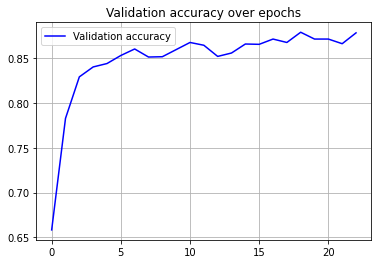

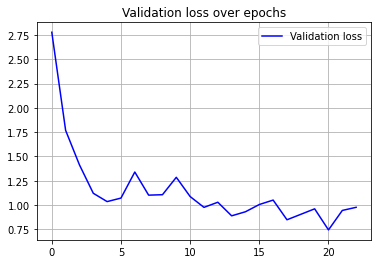

In [76]:

import matplotlib.pyplot as plt

epochs = range(0,NUM_EPOCHS )

# Plot of validation accuracy over epochs
plt.plot(epochs, accuracies, 'b', label='Validation accuracy')
plt.title('Validation accuracy over epochs')
plt.legend()
plt.grid(True)
plt.figure()

# Plot of loss over epochs
plt.plot(epochs, losses, 'b', label='Validation loss')
plt.title('Validation loss over epochs')
plt.legend()
plt.grid(True)
plt.show()


